<a href="https://colab.research.google.com/github/zaeyonz/Wine_Classification/blob/main/Wine_Classification_(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***정형 데이터, 비정형 데이터***

*   ***정형 데이터는 어떤 구조로 되어 있는 데이터를 말함*** --> *ex) CSV, 데이터 베이스(Database), 엑셀(Excel)*
*   프로그래머가 다루는 대부분의 데이터가 정형 데이터임
*   ***비정형 데이터는 데이터베이스나 엑셀로 표현하기 어려운 것들임*** --> *텍스트 데이터, 사진, 음악 등*

# ***Ensemble Learning (앙상블 학슴)***
*   ***정형 데이터를 다루는 데 가장 뛰어난 성과를 내는 알고리즘***
*   ***대부분 결정 트리를 기반으로 만들어졌음***
*   ex)  Random Forest, Extra Tree, Gradient Boosting, Histogram-based Gradient Boosting

# ***Random Forest (랜덤 포레스트)***
*   안정적인 성능으로 널리 사용되고 있음
*   ***결정트리를 랜덤하게 만들어 결정 트리(나무)의 숲을 만듦***
*   ***그리고 각 결정 트리의 예측을 사용해 최종 예측을 만듦***
---
*   Bootstrap Sample 생성 --> ***train set를 복원추출 하여 train set 와 크기가 같은 Bootstrap Sample 생성***

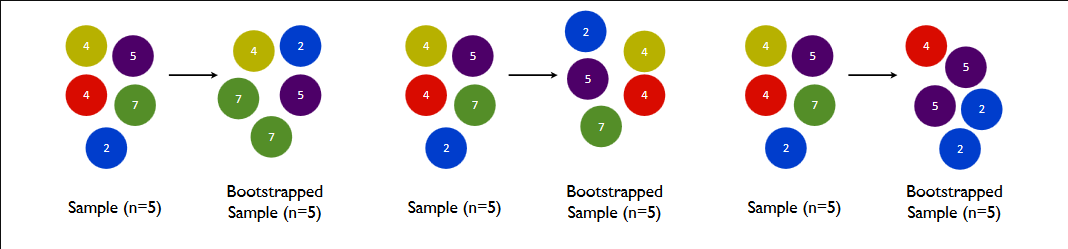
----
*   이 후 각 결정 트리에서의 ***노드 분할은 전체 특성 중에서 일부 특성을 무작위로 고른 다음 이 중에서 최선의 분할을 찾음***
*   **분류 모델인 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼의 특성을 선택함**
*   **회귀 모델인 RandomForestRegressor는 전체 특성을 사용함**
---
*   ***scikit-learn의 랜덤 포레스트는 기본적으로 100개의 결정트리를 위 방식으로 훈련함***
*   그 후, **분류일 경우 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼음**
*   **회귀일 경우 단순히 각 트리의 예측을 평균함**

*   ***랜덤 포레스트는 랜덤하게 선택한 샘플과 특성을 사용하여 train set에 과대 적합하는것을 방지, validation set와 test set에서 안정적인 성능을 보임***

# ***문제 적용***
*   RandomForestClassifier 클래스 사용

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
wine = pd.read_csv('http://bit.ly/wine_csv_data')
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)  # return_train_score 값을 True로 설정하면 검증 점수, 훈련 세트에 한 점수도 같이 반환 함 --> 과대적합 파악 용이
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


*   train set에 다소 과대적합 됨
*   사실 이 예제는 매우 간단하고 특성이 많지 않아 그리드 서치를 사용해도 하이퍼파라미터 튜닝의 결과가 크게 나아지지 않음


*   랜덤 포레스트는 결정 트리의 앙상블이기 때문에 DecisionTreeClassifier가 제공하는 매개변수를 모두 제공함
*   또한 결정 트리의 큰 장점 중 하나인 ***특성 중요도***를 계산함
*   ***랜덤 포레스트의 특성 중요도는 각 결정 트리의 특성 중요도를 취합한 것임***

In [3]:
# 랜덤 포레스트 모델을 train set에 훈련한 후 특성 중요도를 출력
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.23167441 0.50039841 0.26792718]


*   앞선 결정 트리에서의 특성 중요도는 [0.12345626 0.86862934 0.0079144] 였음
*   각각 [알코올 도수, 당도, pH] 임
*   현재 위 결과는 ***두 번째 특성인 당도의 중요성이 감소, 알코올 도수와 pH특성의 중요도가 조금 상승함***
---
---> 랜덤 포레스트가 ***랜덤하게 특성의 일부를 선택하여 하나의 특성에 과도하게 집중 X, 더 많은 특성이 훈련에 기여할 기회를 얻음***

# ***RandomForestClassifier***
*   자체적으로 모델을 평가하는 점수를 얻는 방법은 oob_score 매개변수를 True로 지정
*   이렇게 하면 랜덤 포레스트는 각 결정 트리의  OOB점수를 평균하여 출력
* OOB = out of bag --> 부트스트랩 샘플을 하고 남는 샘플을 뜻함

In [4]:
# OOB 점수 출력

rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


*   교차 검증에서 얻은 점수와 매우 비슷한 결과임
*   ***OOB 점수를 활용하면 교차 검증을 대신할 수 있어 결과적으로 train set에 더 많은 샘플을 사용 가능***

# ***Extra Tree (엑스트라 트리)***
*   **랜덤 포레스트와 매우 비슷** --> *100개의 결정트리 훈련, 거의 동일한 매개변수, 전체 특성중 일부 특성을 랜덤하게 선택하여 노드를 분할*
----

*   엑스트라 트리는 ***부트스트랩 샘플을 사용하지 않음!!***   
*   대신 노드를 분할할 때 가장 좋은 분할을 찾는 것이 아닌 무작위로 분할함
*   ***무작위로 분할한다면 성능이 낮아지지만 많은 트리를 앙상블 하기 때문에 Validation set의 점수를 높이는 효과가 있음***

In [5]:
# ExtraTreesClassifier 모델의 교차 검증 점수 확인
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


*   랜덤 포레스트와 비슷한 결과를 얻음
*   특성이 많지 않아 두 모델의 차이가 크지는 않음

In [6]:
# 엑스트라 트리도 특성 중요도를 제공함

et.fit(train_input, train_target)
print(et.feature_importances_)

[0.20183568 0.52242907 0.27573525]


*   엑스트라 트리도 결정 트리보다 당도에 대한 의존성이 작음

# ***Gradient Boosting (그레디언트 부스팅)***
*   깊이가 얕은 결정 트리를 사용하여 이전 트리의 오차를 보완하는 방식으로 앙상블 하는 방법임
*   GradientBoostingClassifier는 기본적으로 ***깊이가 3인 결정 트리를 100개 사용함***
*   깊이가 얕은 결정트리를 사용하기 때문에 ***과대적합에 강하고 일반적으로 높은 일반화 성능을 기대할 수 있음***
---
*   ***경사 하강법을 사용하여*** 트리를 앙상블에 추가함
*   분류에선 ***로지스틱 손실 함수***, 회귀에선 ***mse 함수***를 사용함

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


*   과대 적합 되지 않음!
*   ***그레디언트 부스팅은 결정 트리의 개수를 늘려도 과대적합에 매우 강함***

In [8]:
# epoch를 늘려서 성능을 향상

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


*    결정 트리 갯수를 500개로 늘렸지만 과대적합 발생 X
*   learning_rate (학습률)의 기본값은 0.1임

In [9]:
# 그레디언트 부스팅도 특성 중요도를 제공함

gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.15872278 0.68010884 0.16116839]


- 그레디언트 부스팅이 랜덤 포레스트보다 '당도'에 더 집중함
- 그레디언트 부스팅은 일반적으로 랜덤 포레스트보다 조금 더 높은 성능을 얻음
- 하지만 훈련 속도가 느림!
- ***즉 n_jobs 매개 변수가 없음!***


# ***Histogram-based Gradient Boosting (히스토그램 기반 그레디언트 부스팅)***
- 그레디언트 부스팅의 속도와 성능을 더욱 개선한 알고리즘
- 정형데이터를 다루는 머신러닝 알고리즘 중에 가장 인기가 높음
- ***입력 특성을 256개 구간으로 나눔, 따라서 노드를 분할할 깨 최적의 분할을 매우 빠르게 찾을 수 있음***
- ***따로 전처리할 필요가 없음***
- HistGradientBoostingClassifier는 기본 매개변수에서 안정적인 성능을 얻을 수 있음
- n_estimaors 대신에 부스팅 반복 횟수를 지정하는 max_iter를 사용홤


In [10]:
from sklearn.ensemble._hist_gradient_boosting.gradient_boosting import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


- 그레디언트 부스팅보다 조금 더 높은 성능을 제공함
- 히스토그램 기반 그레디언트 부스팅의 특성중요도를 계산하기 위해 permutation_importance() 함수를 사용함


In [14]:
from sklearn.inspection import permutation_importance

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42 ,n_jobs=-1)  # n_repeats 매개변수는 특성들을 랜덤하게 섞을 횟수를 지정함, default = 5
print(result.importances_mean)

[0.08876275 0.23438522 0.08027708]


- 평균은 랜덤포레스트와 비슷한 비율임

In [15]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05969231 0.20238462 0.049     ]


- test set의 결과도 그레디언트 부스팅과 비슷하게 조금 더 당도에 집중하고 있음

In [16]:
# test set에서의 성능 확인
hgb.score(test_input, test_target)

0.8723076923076923

- 약 87%의 정확도 (랜덤 서치에서의 정확도는 86%임)

# ***XGBoost***
- cross_validate() 함수와 같이 사용가능
- 다양한 부스팅 알고리즘 지원
- tree_method 매개변수를 'hist'로 지정하면 히스토그램 기반 그레디언트 부스팅 사용가능

In [20]:
from xgboost import XGBClassifier

xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)

print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9555033709953124 0.8799326275264677


# ***LightGBM***
- 마이크로소프트에서 만든 히스토그램 기반 그레디언트 부스팅
- 빠르고 최신 기술을 많이 적용하고 있어서 인기가 높아지고 있음


In [22]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.935828414851749 0.8801251203079884


- scikit-learn의 히스토그램 기반 그레디언트 부스팅은 LightGBM에서 영향을 많이 받음